<font color="#399DA6"><h1>Feature Conditioning Method: Sequential Feature Selection</h1></font>

Importing all the required libraries:

    "Load_data": extracts all the features from dataset
    
    "SFS": Sequential Feature Selection library

In [3]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *
from SFS import *

In [2]:
dataset='591'
df=loaddata(features=["chroma_cqt","melspectrogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
y=df["dastgah"]

Using *loaddata()*, all the features from dataset are extracted and stored in a data frame.

The 591 Dataset includes all the spectral and rhythm features.

Some of these features are selected to form the data frame.

Then features and labels are divided.

Using "train_test_split" library, the dataframe is split into test and train sections. test size is 30 percent.
Preprocessing on feature sets:

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature_vectors,y,test_size=0.3,random_state=0)

from preprocess import *
X_train,X_test = preprocess(X_train,X_test)

Utilizing the SFS library, feature conditioning is done and only the selected features are stored in *feature_vectors* data frame.

<font color="#323F93"><h1>1) Forward Selection</h2></font>

Choosing the mode as "True" selects the Forward selection method.

In [4]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
# classifier = svm.SVC()
classifier = LinearRegression()
Sfs=SFS(X_train,y_train,5)
X_train,y_train=Sfs.SFSout(classifier =classifier, mode= True)
X_test = Sfs.SFS_changeX(X_test)
pd.DataFrame(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed:    4.6s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed:    4.1s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 137 out of 137 | elapsed:    4.2s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:    6.1s finished
Features: 5/5

,feature60,feature70,feature94,feature101,feature111
0,-0.380290,-0.507330,-0.443945,-0.303998,-0.384311
1,-0.415996,-0.329915,-0.328922,-0.253000,-0.348527
2,0.714387,-0.231399,-0.423288,-0.306744,-0.429176
3,-0.410395,-0.454516,-0.382218,-0.267568,-0.380833
4,-0.421872,-0.373587,-0.411815,-0.266308,-0.392345
...,...,...,...,...,...
203,-0.179979,0.111774,0.053536,0.023288,4.810437
204,-0.423893,-0.363371,-0.277292,-0.129133,-0.221969
205,0.161952,-0.342255,-0.392412,-0.283126,-0.401515
206,-0.426589,-0.124849,-0.407074,-0.301793,-0.426067


The selected features are shown:

In [5]:
X_train.describe()


,feature60,feature70,feature94,feature101,feature111
count,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02
mean,4.220683e-17,1.835079e-17,-2.569111e-17,3.670159e-18,-3.670159e-17
std,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00
min,-4.494208e-01,-5.367108e-01,-4.505087e-01,-3.114027e-01,-4.297408e-01
25%,-4.007866e-01,-4.816962e-01,-4.201178e-01,-2.997713e-01,-4.241774e-01
50%,-2.993894e-01,-3.578633e-01,-3.349306e-01,-2.587824e-01,-3.633156e-01
75%,-5.694148e-02,-6.185849e-03,-3.717181e-02,-1.141638e-01,-6.976014e-02
max,1.101775e+01,8.249652e+00,1.099950e+01,1.288636e+01,1.001063e+01


In [6]:
X_test.describe()

,feature60,feature70,feature94,feature101,feature111
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,-0.001177,-0.073352,0.159178,0.114070,0.001697
std,0.976958,0.707412,1.369114,1.340543,0.978801
min,-0.449687,-0.538032,-0.450504,-0.311401,-0.429741
25%,-0.391690,-0.465793,-0.418710,-0.297052,-0.420024
50%,-0.303055,-0.341357,-0.331869,-0.248192,-0.364515
75%,-0.022854,-0.006633,0.006754,-0.030591,-0.021922
max,8.138247,4.404252,8.707376,11.832561,5.905666


Classifiers KNN, SVM, MLP, Logistic, Adaboost, and XGBoost are used

<font color="#61C29E"><h1>1) KNN</h2></font>
After classification, accuracy and confusion matrix are reported.

In [7]:
Accuracies = [["KNN",0], ["SVM",0], ["MLP",0], ["Logistic",0], ["Adaboost",0], ["XGBoost",0]]
LDA_var = False

The best accuracy is 19.59 % with k = 44
Cross-Validation Results:  [0.24742268041237114, 0.16494845360824742, 0.20618556701030927, 0.18556701030927836, 0.17525773195876287]
min validation accuracy is 16.49 % with k = 44
mean validation accuracy is 19.59 % with k = 44
max validation accuracy is 24.74 % with k = 44


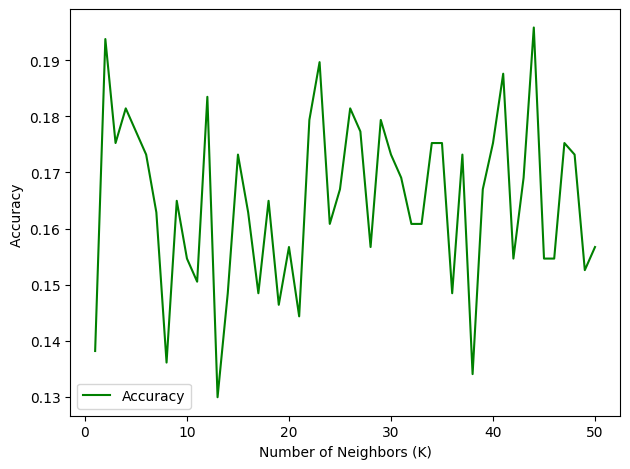

====> Test accuracy is 14.9 % with k = 44


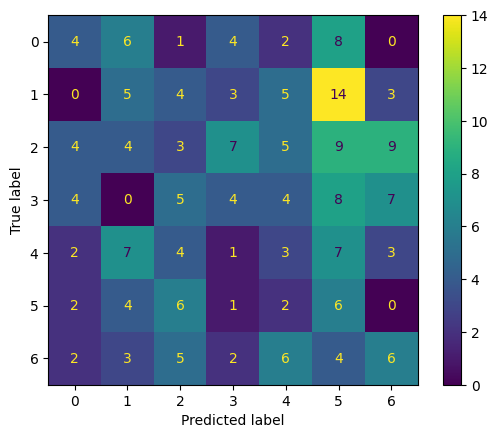

In [8]:
from KNN import *
Knn=KNN(X_train,y_train,X_test,y_test)
Knn.plot(50)
Accuracies[0][1] = Knn.acc

<font color="#61C29E"><h1>2) SVM</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.21649484536082475, 0.17525773195876287, 0.14432989690721648, 0.21649484536082475, 0.1958762886597938]
min validation accuracy is 14.43
mean validation accuracy is 18.97
max validation accuracy is 21.65
====> Test accuracy is 12.5


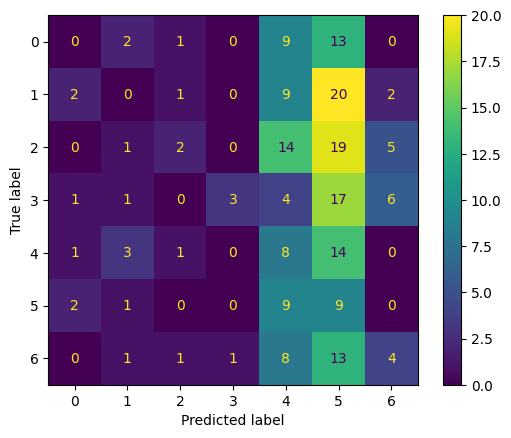

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        25
         1.0       0.00      0.00      0.00        34
         2.0       0.33      0.05      0.09        41
         3.0       0.75      0.09      0.17        32
         4.0       0.13      0.30      0.18        27
         5.0       0.09      0.43      0.14        21
         6.0       0.24      0.14      0.18        28

    accuracy                           0.12       208
   macro avg       0.22      0.14      0.11       208
weighted avg       0.24      0.12      0.10       208



In [9]:
from SVM import *
svm=SVM(X_train,y_train,X_test,y_test)
svm.accurate(LDA_in=LDA_var)
Accuracies[1][1] = svm.acc

<font color="#61C29E"><h1>1) MLP</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.23711340206185566, 0.15463917525773196, 0.18556701030927836, 0.1134020618556701, 0.18556701030927836]
min validation accuracy is 11.34
mean validation accuracy is 17.53
max validation accuracy is 23.71
====> Test accuracy is 16.83


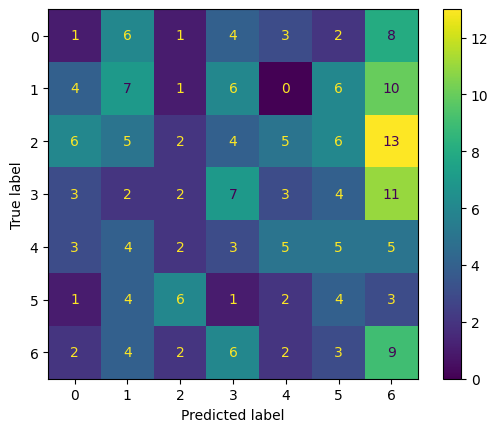

              precision    recall  f1-score   support

         0.0       0.05      0.04      0.04        25
         1.0       0.22      0.21      0.21        34
         2.0       0.12      0.05      0.07        41
         3.0       0.23      0.22      0.22        32
         4.0       0.25      0.19      0.21        27
         5.0       0.13      0.19      0.16        21
         6.0       0.15      0.32      0.21        28

    accuracy                           0.17       208
   macro avg       0.17      0.17      0.16       208
weighted avg       0.17      0.17      0.16       208



In [10]:
from mlp import *
mlp=MLP(X_train,y_train,X_test,y_test)
mlp.accurate(LDA_in=LDA_var)
Accuracies[2][1] = mlp.acc

<font color="#61C29E"><h1>1) Logistic</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.24742268041237114, 0.24742268041237114, 0.16494845360824742, 0.23711340206185566, 0.21649484536082475]
min validation accuracy is 16.49
mean validation accuracy is 22.27
max validation accuracy is 24.74
====> Test accuracy is 13.94


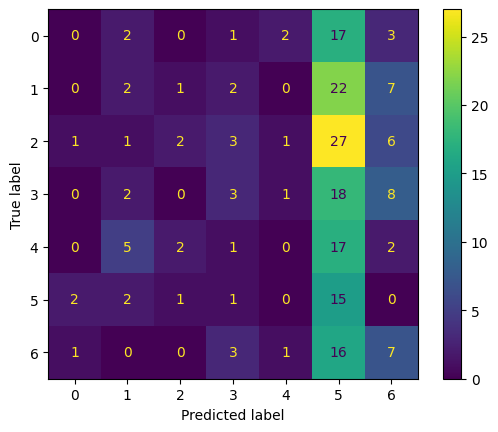

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        25
         1.0       0.14      0.06      0.08        34
         2.0       0.33      0.05      0.09        41
         3.0       0.21      0.09      0.13        32
         4.0       0.00      0.00      0.00        27
         5.0       0.11      0.71      0.20        21
         6.0       0.21      0.25      0.23        28

    accuracy                           0.14       208
   macro avg       0.15      0.17      0.10       208
weighted avg       0.16      0.14      0.10       208



In [11]:
from LogisticRegression import *
lr=LR(X_train,y_train,X_test,y_test)
lr.accurate(LDA_in=LDA_var)
Accuracies[3][1] = lr.acc

<font color="#61C29E"><h1>1) AdaBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.17525773195876287, 0.10309278350515463, 0.12371134020618557, 0.1958762886597938, 0.18556701030927836]
min validation accuracy is 10.31
mean validation accuracy is 15.67
max validation accuracy is 19.59
====> Test accuracy is 12.98


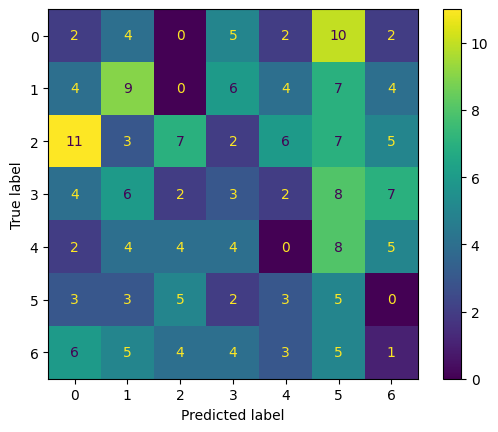

              precision    recall  f1-score   support

         0.0       0.06      0.08      0.07        25
         1.0       0.26      0.26      0.26        34
         2.0       0.32      0.17      0.22        41
         3.0       0.12      0.09      0.10        32
         4.0       0.00      0.00      0.00        27
         5.0       0.10      0.24      0.14        21
         6.0       0.04      0.04      0.04        28

    accuracy                           0.13       208
   macro avg       0.13      0.13      0.12       208
weighted avg       0.15      0.13      0.13       208



In [12]:
from adaboost import *
adaboost=ADABOOST(X_train,y_train,X_test,y_test)
adaboost.accurate(LDA_in=LDA_var)
Accuracies[4][1] = adaboost.acc

<font color="#61C29E"><h1>1) XGBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.20618556701030927, 0.18556701030927836, 0.12371134020618557, 0.2268041237113402, 0.1958762886597938]
min validation accuracy is 12.37
mean validation accuracy is 18.76
max validation accuracy is 22.68
====> Test accuracy is 17.31


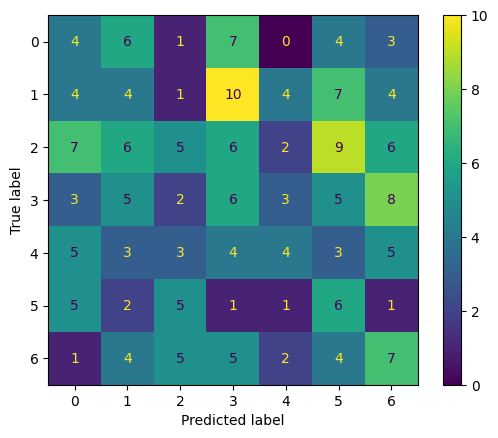

              precision    recall  f1-score   support

         0.0       0.14      0.16      0.15        25
         1.0       0.13      0.12      0.12        34
         2.0       0.23      0.12      0.16        41
         3.0       0.15      0.19      0.17        32
         4.0       0.25      0.15      0.19        27
         5.0       0.16      0.29      0.20        21
         6.0       0.21      0.25      0.23        28

    accuracy                           0.17       208
   macro avg       0.18      0.18      0.17       208
weighted avg       0.18      0.17      0.17       208



In [13]:
from XGBoost import *
xgboost=XGBoost(X_train,y_train,X_test,y_test)
xgboost.accurate(LDA_in=LDA_var)
Accuracies[5][1] = xgboost.acc

In [14]:
print(Accuracies)
temp = np.zeros((6,1))
for i in range(6):
    temp[i] = Accuracies[i][1]
for j in range(6):
    if Accuracies[j][1] == np.max(temp):
        print(Accuracies[j])

[['KNN', 0.14903846153846154], ['SVM', 0.125], ['MLP', 0.16826923076923078], ['Logistic', 0.13942307692307693], ['Adaboost', 0.12980769230769232], ['XGBoost', 0.17307692307692307]]
['XGBoost', 0.17307692307692307]


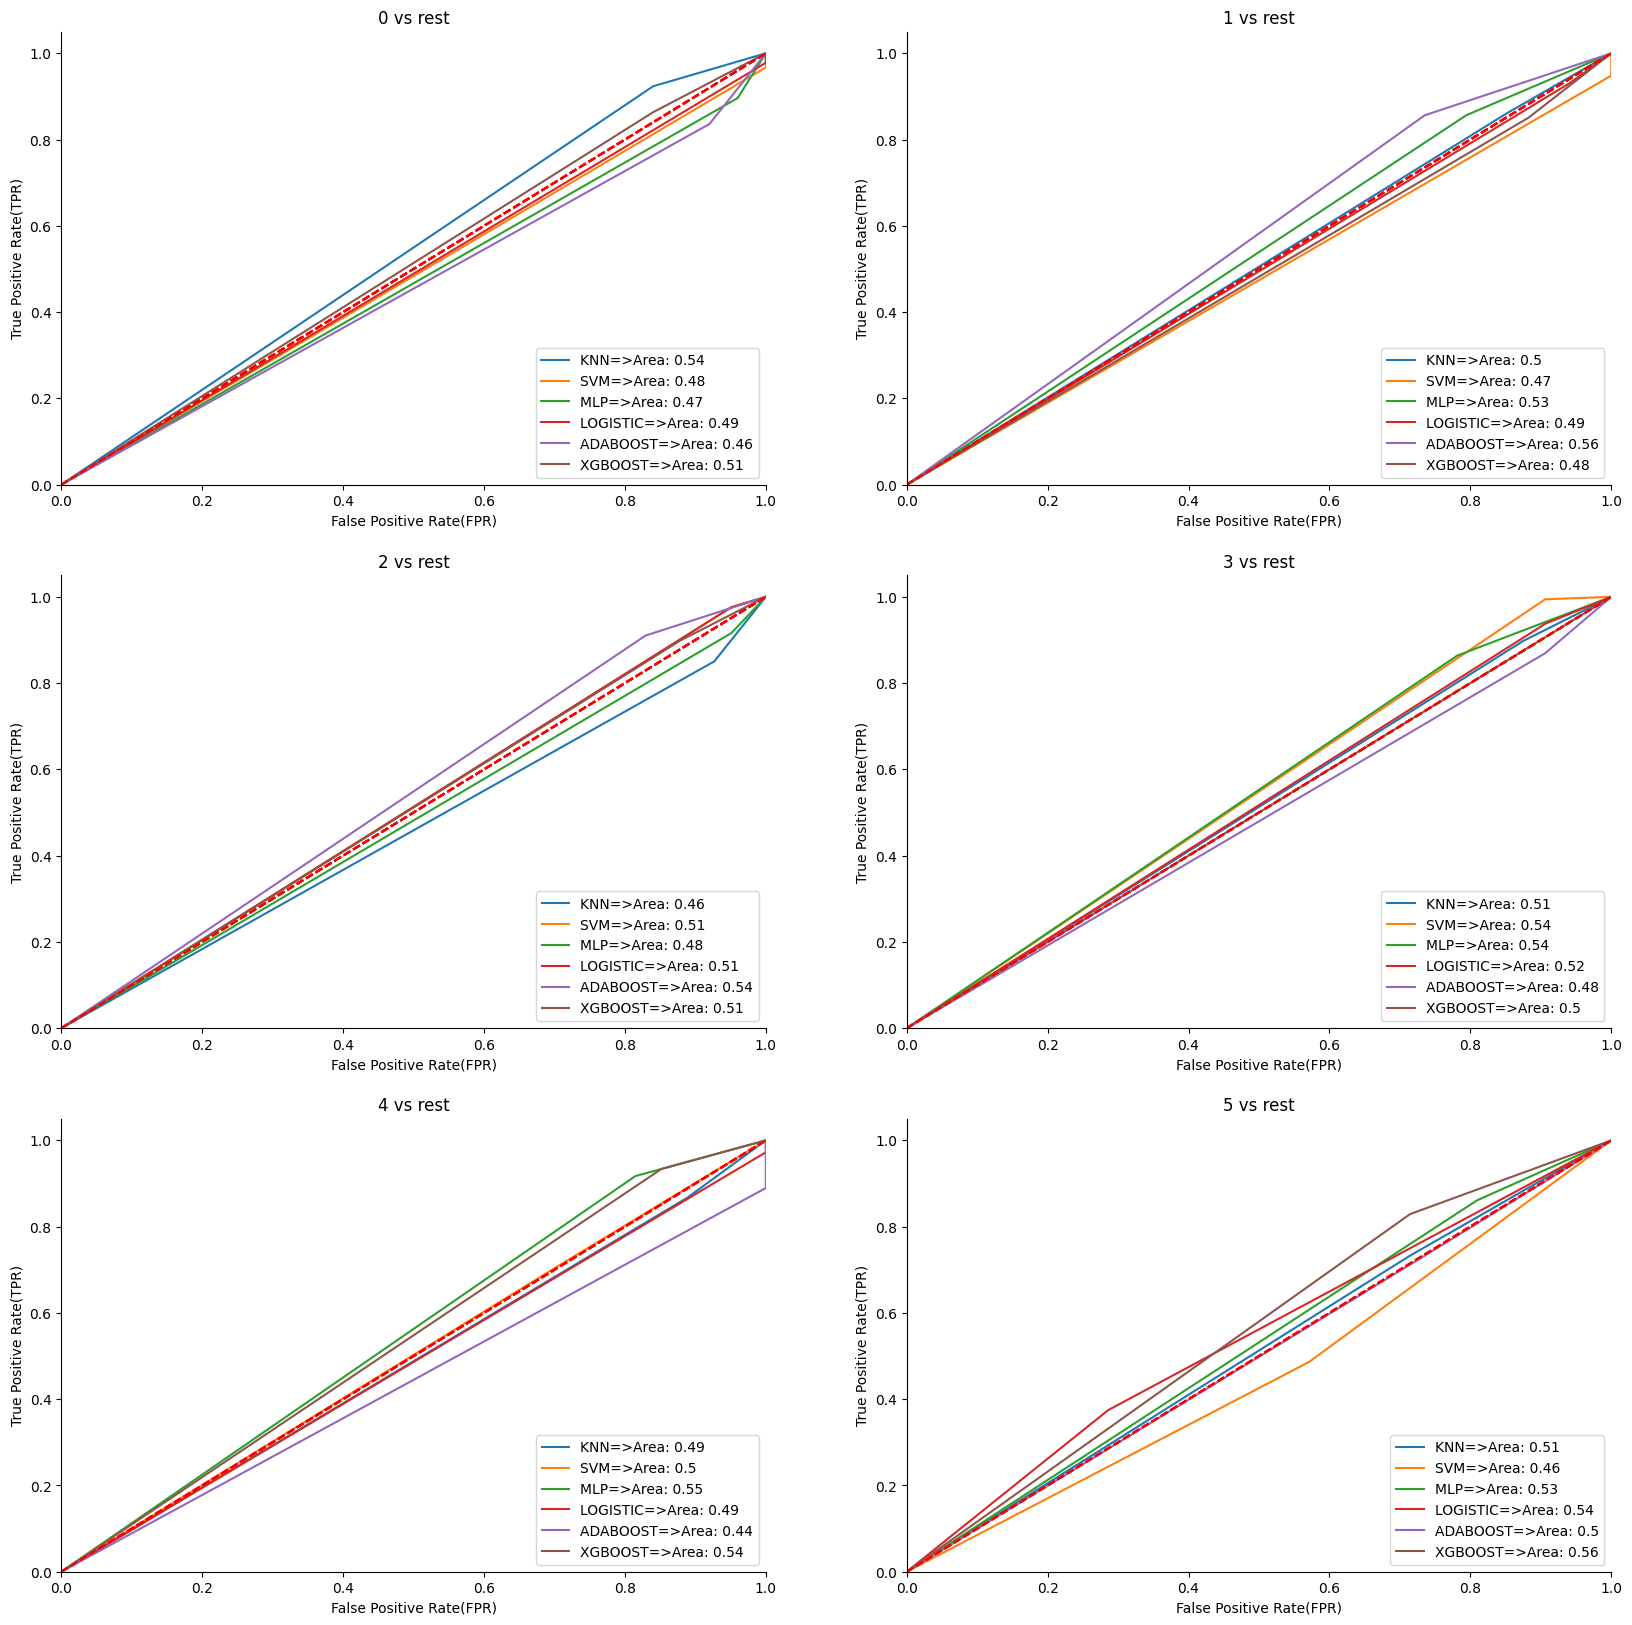

In [15]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report



## ROC Plotting function
def plot_roc(Y_test, ypr,axs,ll,x):   
    logit_roc_auc = roc_auc_score(Y_test, ypr,multi_class='ovr')
    fpr, tpr, _ = roc_curve(Y_test, ypr)
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    axs.plot(fpr, tpr, label=ll+'=>Area: '+str(round(logit_roc_auc,2)))
    # axs.text(0.2,.6,'Area = %0.2f' % logit_roc_auc,size=15)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title(f'{x} vs rest')
    axs.legend(loc="lower right")

_,axs = plt.subplots(3,2,figsize=(20,20))
for x in range(6):
    y0=[list(y_test),list(y_test),list(y_test),list(y_test),list(y_test),list(y_test)]
    yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
    for k in range(len(yt0)):
        for i in range(len(yt0[k])):
            if(y0[k][i]!=x):
                y0[k][i]=1
            else:
                y0[k][i]=0
            if(yt0[k][i]!=x):
                yt0[k][i]=1
            else:
                yt0[k][i]=0
    plot_roc(y0[0],yt0[0],axs[(x>=4)*1+(x>=2)*1+0][x%2],'KNN',x)
    plot_roc(y0[1],yt0[1],axs[(x>=4)*1+(x>=2)*1+0][x%2],'SVM',x)
    plot_roc(y0[2],yt0[2],axs[(x>=4)*1+(x>=2)*1+0][x%2],'MLP',x)
    plot_roc(y0[3],yt0[3],axs[(x>=4)*1+(x>=2)*1+0][x%2],'LOGISTIC',x)
    plot_roc(y0[4],yt0[4],axs[(x>=4)*1+(x>=2)*1+0][x%2],'ADABOOST',x)
    plot_roc(y0[5],yt0[5],axs[(x>=4)*1+(x>=2)*1+0][x%2],'XGBOOST',x)

plt.show()

<font color="#323F93"><h1>2) Backward Elimination</h2></font>

In [4]:
dataset='591'
df=loaddata(features=["chroma_cqt","melspectrogram"], 
            adr1=f'../Datas/X_{dataset}.pickle',
            adr2=f'../Datas/label_instrument_{dataset}.pickle',
            adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah", "instrument"],axis=1)
y=df["dastgah"]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature_vectors,y,test_size=0.3,random_state=0)

from preprocess import *
X_train,X_test = preprocess(X_train,X_test)

Choosing the mode as "False" selects the Backward Elimination method.

In [6]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
# classifier = svm.SVC()
classifier = LinearRegression()
Sfs=SFS(X_train,y_train,5)
X_train,y_train=Sfs.SFSout(classifier =classifier, mode= False)
X_test = Sfs.SFS_changeX(X_test)
pd.DataFrame(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   25.4s finished
Features: 139/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed:   14.6s finished
Features: 138/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed:   15.7s finished
Features: 137/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 137 out of 137 | elapsed:   12.7s finished
Features: 136/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 136 out of 136 | elapsed:   10.1s finished
Features: 135/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   11.9s finished
Features: 134/5[Par

,feature77,feature102,feature134,feature135,feature136
0,-0.073040,-0.274606,-0.147971,-0.092605,-0.074163
1,-0.009460,-0.257379,-0.148025,-0.092641,-0.074194
2,-0.142450,-0.283737,-0.147979,-0.092611,-0.074169
3,-0.256627,-0.267114,-0.148042,-0.092653,-0.074204
4,-0.290990,-0.213289,0.087164,0.050476,-0.027513
...,...,...,...,...,...
203,-0.236393,0.094956,-0.148052,-0.092659,-0.074210
204,-0.223798,-0.087042,-0.148043,-0.092653,-0.074205
205,-0.266993,-0.240833,-0.144677,-0.091483,-0.074001
206,-0.273249,-0.277454,-0.148025,-0.092640,-0.074193


In [7]:
X_train.describe()

,feature77,feature102,feature134,feature135,feature136
count,4.840000e+02,4.840000e+02,4.840000e+02,484.000000,4.840000e+02
mean,3.670159e-18,1.468064e-17,-5.505238e-18,0.000000,7.340318e-18
std,1.001035e+00,1.001035e+00,1.001035e+00,1.001035,1.001035e+00
min,-3.111292e-01,-2.865291e-01,-1.480566e-01,-0.092662,-7.421242e-02
25%,-2.866787e-01,-2.749688e-01,-1.480356e-01,-0.092648,-7.420097e-02
50%,-2.325273e-01,-2.397214e-01,-1.479872e-01,-0.092619,-7.418128e-02
75%,-5.905522e-02,-8.043960e-02,-1.465059e-01,-0.092007,-7.405341e-02
max,1.402222e+01,1.771687e+01,1.885754e+01,21.264606,2.170427e+01


In [8]:
X_test.describe()

,feature77,feature102,feature134,feature135,feature136
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,-0.030602,0.102195,-0.060555,-0.055389,-0.046333
std,0.729105,1.146768,0.432853,0.172549,0.187910
min,-0.311101,-0.286528,-0.148056,-0.092662,-0.074212
25%,-0.283929,-0.274608,-0.148037,-0.092649,-0.074202
50%,-0.238056,-0.228789,-0.147975,-0.092611,-0.074182
75%,-0.107610,-0.027729,-0.143274,-0.090224,-0.074065
max,7.319973,7.969682,5.023235,1.772842,2.461369


<font color="#61C29E"><h1>1) KNN</h2></font>
After classification, accuracy and confusion matrix are reported.

In [9]:
Accuracies = [["KNN",0], ["SVM",0], ["MLP",0], ["Logistic",0], ["Adaboost",0], ["XGBoost",0]]
LDA_var = False

The best accuracy is 20.82 % with k = 1
Cross-Validation Results:  [0.23711340206185566, 0.2268041237113402, 0.13402061855670103, 0.20618556701030927, 0.23711340206185566]
min validation accuracy is 13.4 % with k = 1
mean validation accuracy is 20.82 % with k = 1
max validation accuracy is 23.71 % with k = 1


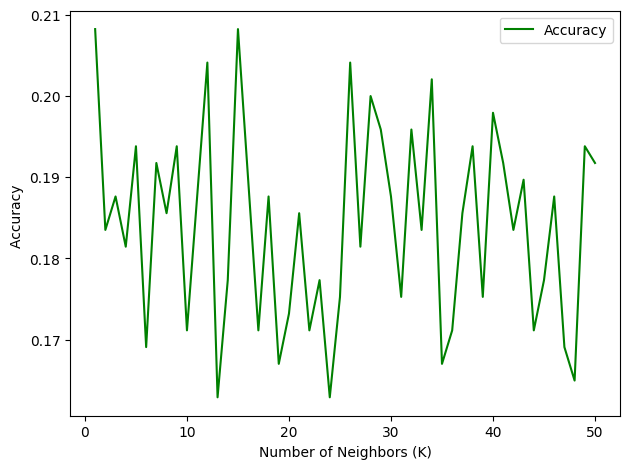

====> Test accuracy is 19.71 % with k = 1


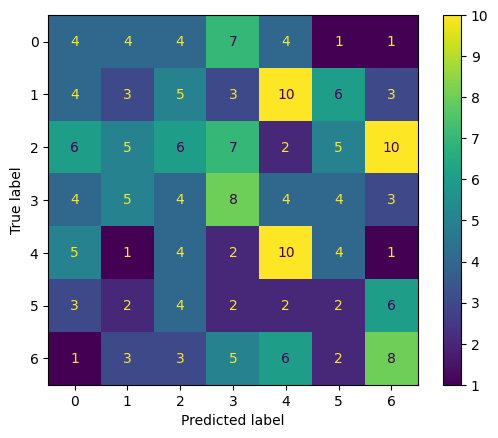

In [10]:
from KNN import *
Knn=KNN(X_train,y_train,X_test,y_test)
Knn.plot(50, LDA_in = LDA_var)
Accuracies[0][1] = Knn.acc

<font color="#61C29E"><h1>2) SVM</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.28865979381443296, 0.16494845360824742, 0.21649484536082475, 0.16494845360824742, 0.18556701030927836]
min validation accuracy is 16.49
mean validation accuracy is 20.41
max validation accuracy is 28.87
====> Test accuracy is 14.9


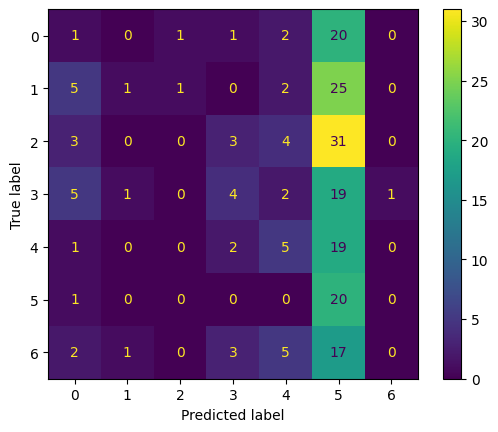

              precision    recall  f1-score   support

         0.0       0.06      0.04      0.05        25
         1.0       0.33      0.03      0.05        34
         2.0       0.00      0.00      0.00        41
         3.0       0.31      0.12      0.18        32
         4.0       0.25      0.19      0.21        27
         5.0       0.13      0.95      0.23        21
         6.0       0.00      0.00      0.00        28

    accuracy                           0.15       208
   macro avg       0.15      0.19      0.10       208
weighted avg       0.15      0.15      0.09       208



In [11]:
from SVM import *
svm=SVM(X_train,y_train,X_test,y_test)
svm.accurate(LDA_in=LDA_var)
Accuracies[1][1] = svm.acc

<font color="#61C29E"><h1>1) MLP</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.21649484536082475, 0.18556701030927836, 0.27835051546391754, 0.15463917525773196, 0.2268041237113402]
min validation accuracy is 15.46
mean validation accuracy is 21.24
max validation accuracy is 27.84
====> Test accuracy is 13.46


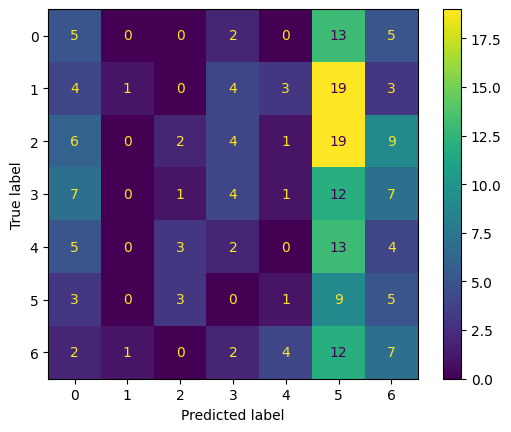

              precision    recall  f1-score   support

         0.0       0.16      0.20      0.18        25
         1.0       0.50      0.03      0.06        34
         2.0       0.22      0.05      0.08        41
         3.0       0.22      0.12      0.16        32
         4.0       0.00      0.00      0.00        27
         5.0       0.09      0.43      0.15        21
         6.0       0.17      0.25      0.21        28

    accuracy                           0.13       208
   macro avg       0.20      0.15      0.12       208
weighted avg       0.21      0.13      0.11       208



In [12]:
from mlp import *
mlp=MLP(X_train,y_train,X_test,y_test)
mlp.accurate(LDA_in=LDA_var)
Accuracies[2][1] = mlp.acc

<font color="#61C29E"><h1>1) Logistic</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.17525773195876287, 0.15463917525773196, 0.1958762886597938, 0.15463917525773196, 0.17525773195876287]
min validation accuracy is 15.46
mean validation accuracy is 17.11
max validation accuracy is 19.59
====> Test accuracy is 15.87


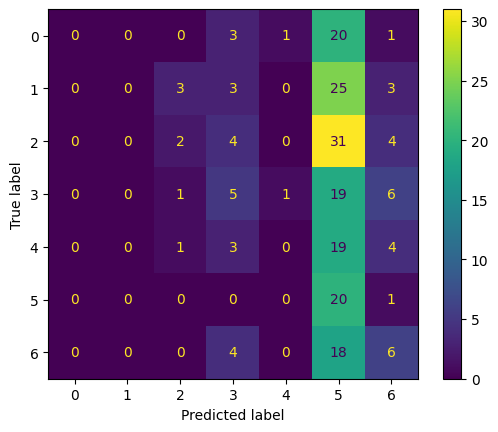

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        25
         1.0       0.00      0.00      0.00        34
         2.0       0.29      0.05      0.08        41
         3.0       0.23      0.16      0.19        32
         4.0       0.00      0.00      0.00        27
         5.0       0.13      0.95      0.23        21
         6.0       0.24      0.21      0.23        28

    accuracy                           0.16       208
   macro avg       0.13      0.20      0.10       208
weighted avg       0.14      0.16      0.10       208



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [13]:
from LogisticRegression import *
lr=LR(X_train,y_train,X_test,y_test)
lr.accurate(LDA_in=LDA_var)
Accuracies[3][1] = lr.acc

<font color="#61C29E"><h1>1) AdaBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.17525773195876287, 0.15463917525773196, 0.14432989690721648, 0.16494845360824742, 0.12371134020618557]
min validation accuracy is 12.37
mean validation accuracy is 15.26
max validation accuracy is 17.53
====> Test accuracy is 15.38


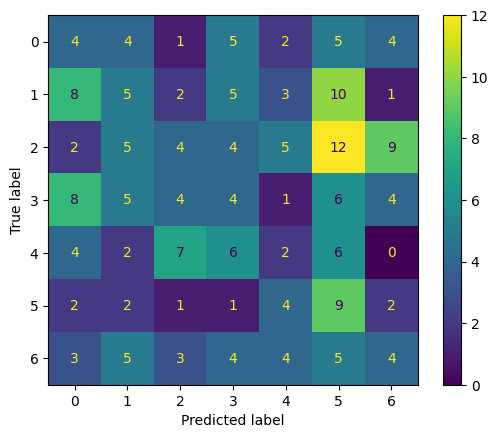

              precision    recall  f1-score   support

         0.0       0.13      0.16      0.14        25
         1.0       0.18      0.15      0.16        34
         2.0       0.18      0.10      0.13        41
         3.0       0.14      0.12      0.13        32
         4.0       0.10      0.07      0.08        27
         5.0       0.17      0.43      0.24        21
         6.0       0.17      0.14      0.15        28

    accuracy                           0.15       208
   macro avg       0.15      0.17      0.15       208
weighted avg       0.15      0.15      0.14       208



In [14]:
from adaboost import *
adaboost=ADABOOST(X_train,y_train,X_test,y_test)
adaboost.accurate(LDA_in=LDA_var)
Accuracies[4][1] = adaboost.acc

<font color="#61C29E"><h1>1) XGBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.21649484536082475, 0.20618556701030927, 0.15463917525773196, 0.18556701030927836, 0.15463917525773196]
min validation accuracy is 15.46
mean validation accuracy is 18.35
max validation accuracy is 21.65
====> Test accuracy is 19.71


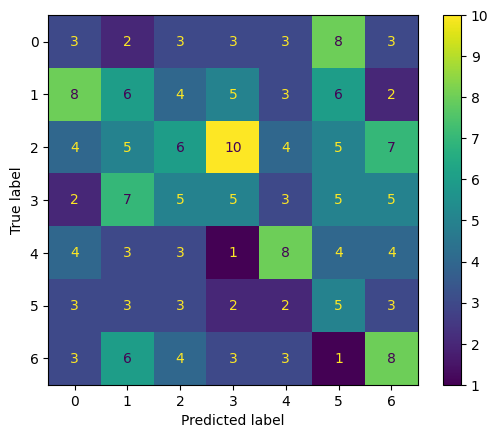

              precision    recall  f1-score   support

         0.0       0.11      0.12      0.12        25
         1.0       0.19      0.18      0.18        34
         2.0       0.21      0.15      0.17        41
         3.0       0.17      0.16      0.16        32
         4.0       0.31      0.30      0.30        27
         5.0       0.15      0.24      0.18        21
         6.0       0.25      0.29      0.27        28

    accuracy                           0.20       208
   macro avg       0.20      0.20      0.20       208
weighted avg       0.20      0.20      0.20       208



In [15]:
from XGBoost import *
xgboost=XGBoost(X_train,y_train,X_test,y_test)
xgboost.accurate(LDA_in=LDA_var)
Accuracies[5][1] = xgboost.acc

In [16]:
print(Accuracies)
temp = np.zeros((6,1))
for i in range(6):
    temp[i] = Accuracies[i][1]
for j in range(6):
    if Accuracies[j][1] == np.max(temp):
        print(Accuracies[j])

[['KNN', 0.1971153846153846], ['SVM', 0.14903846153846154], ['MLP', 0.1346153846153846], ['Logistic', 0.15865384615384615], ['Adaboost', 0.15384615384615385], ['XGBoost', 0.1971153846153846]]
['KNN', 0.1971153846153846]
['XGBoost', 0.1971153846153846]


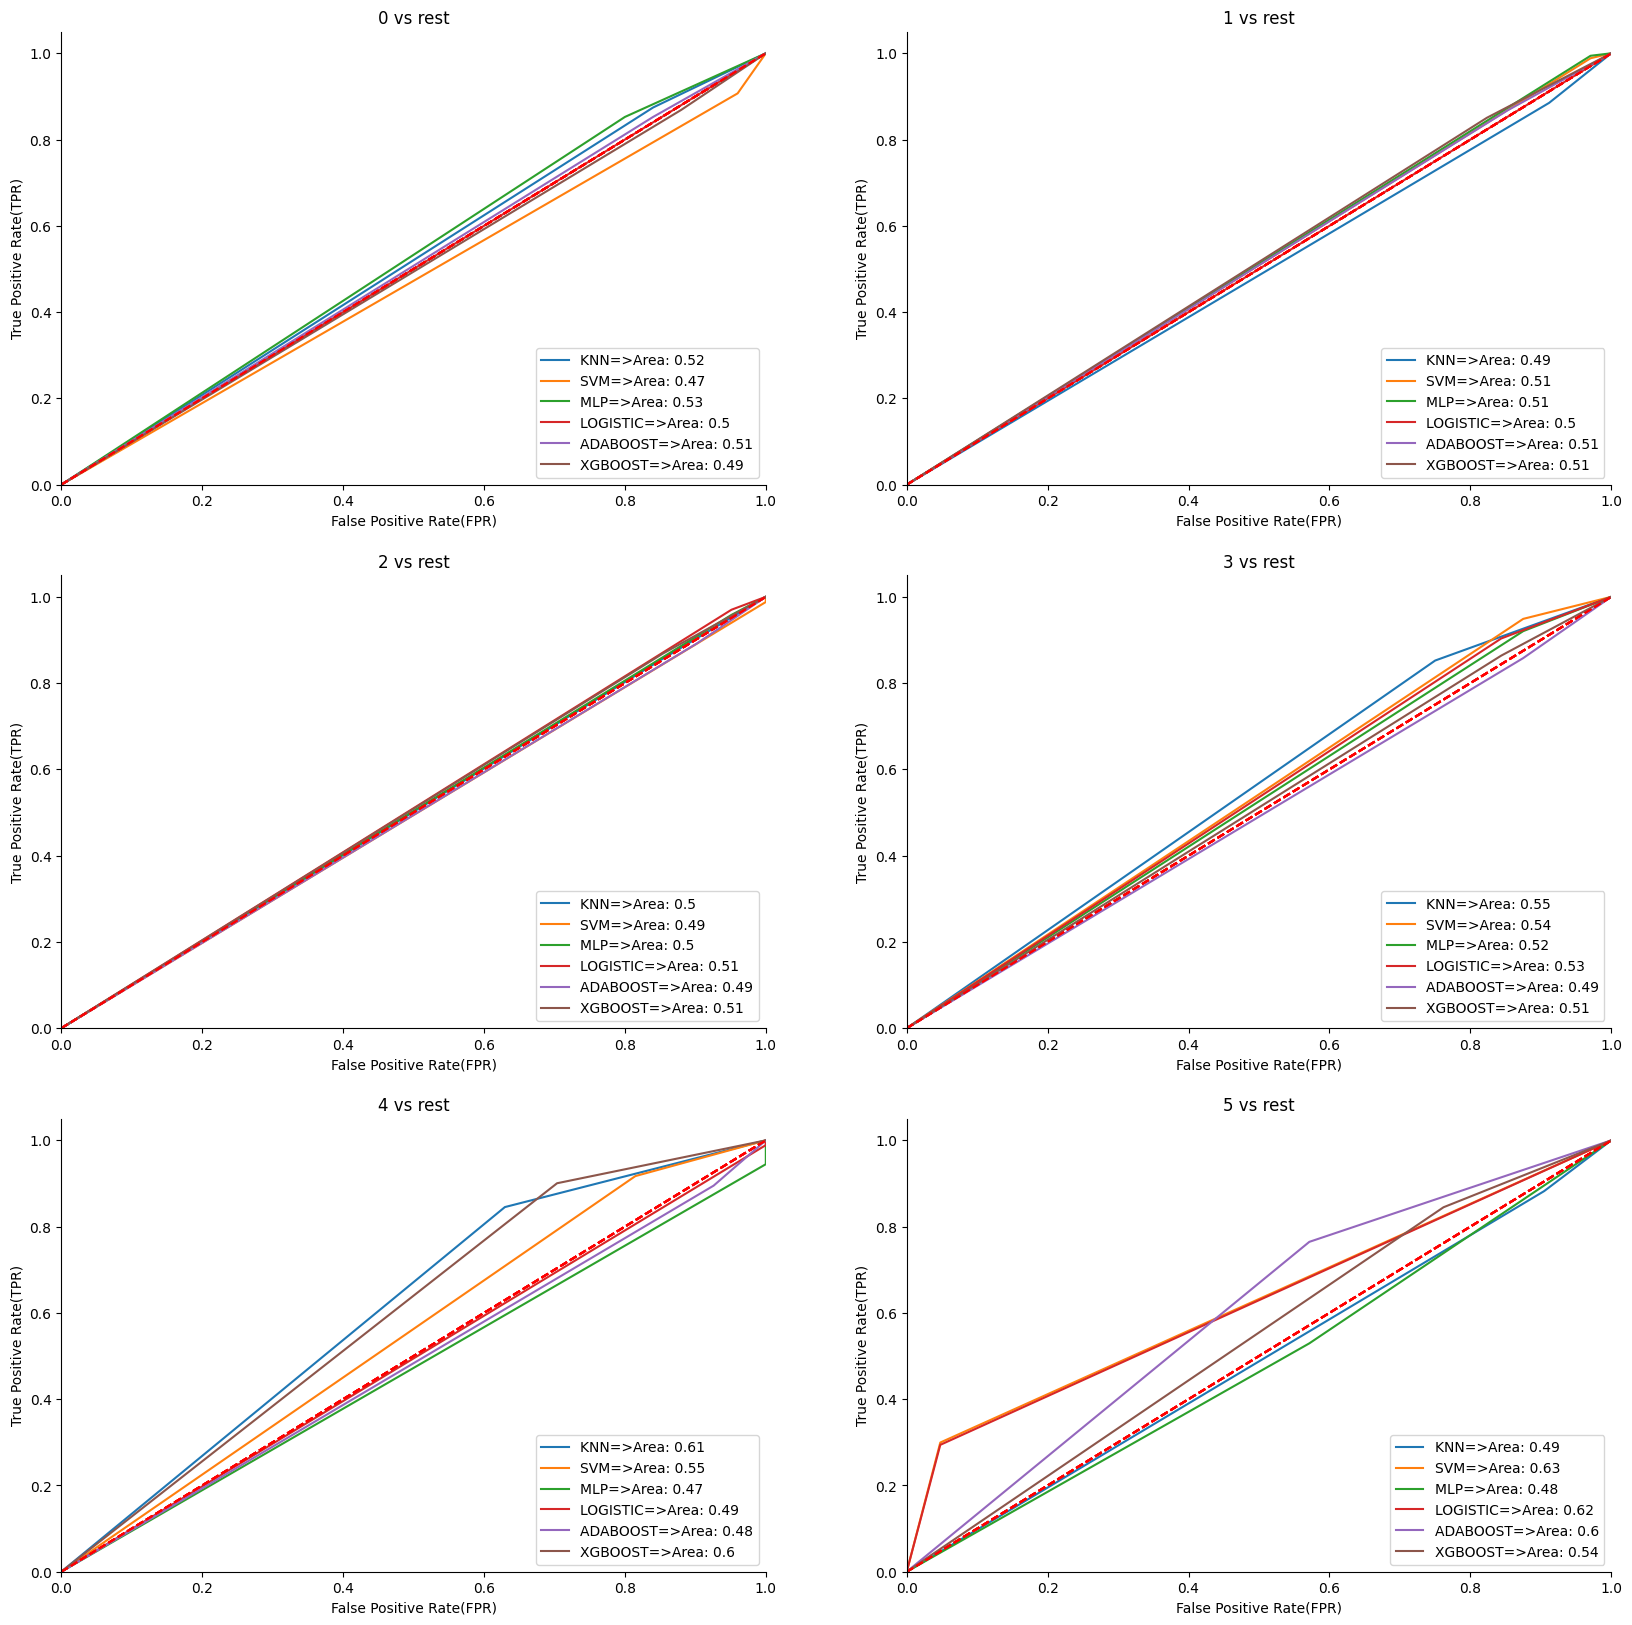

In [17]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report



## ROC Plotting function
def plot_roc(Y_test, ypr,axs,ll,x):   
    logit_roc_auc = roc_auc_score(Y_test, ypr,multi_class='ovr')
    fpr, tpr, _ = roc_curve(Y_test, ypr)
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    axs.plot(fpr, tpr, label=ll+'=>Area: '+str(round(logit_roc_auc,2)))
    # axs.text(0.2,.6,'Area = %0.2f' % logit_roc_auc,size=15)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title(f'{x} vs rest')
    axs.legend(loc="lower right")

_,axs = plt.subplots(3,2,figsize=(20,20))
for x in range(6):
    y0=[list(y_test),list(y_test),list(y_test),list(y_test),list(y_test),list(y_test)]
    yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
    for k in range(len(yt0)):
        for i in range(len(yt0[k])):
            if(y0[k][i]!=x):
                y0[k][i]=1
            else:
                y0[k][i]=0
            if(yt0[k][i]!=x):
                yt0[k][i]=1
            else:
                yt0[k][i]=0
    plot_roc(y0[0],yt0[0],axs[(x>=4)*1+(x>=2)*1+0][x%2],'KNN',x)
    plot_roc(y0[1],yt0[1],axs[(x>=4)*1+(x>=2)*1+0][x%2],'SVM',x)
    plot_roc(y0[2],yt0[2],axs[(x>=4)*1+(x>=2)*1+0][x%2],'MLP',x)
    plot_roc(y0[3],yt0[3],axs[(x>=4)*1+(x>=2)*1+0][x%2],'LOGISTIC',x)
    plot_roc(y0[4],yt0[4],axs[(x>=4)*1+(x>=2)*1+0][x%2],'ADABOOST',x)
    plot_roc(y0[5],yt0[5],axs[(x>=4)*1+(x>=2)*1+0][x%2],'XGBOOST',x)

plt.show()